In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import random
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import seaborn as sns

%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
print("Train Shape:",X_train.shape)

Train Shape: (50000, 32, 32, 3)


In [4]:
print("Test Shape:",X_test.shape)

Test Shape: (10000, 32, 32, 3)


In [5]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = pd.Series(y_train.reshape(-1,))
y_test = pd.Series(y_test.reshape(-1,))

<BarContainer object of 10 artists>

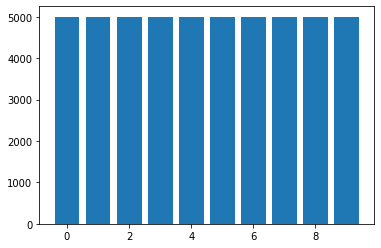

In [7]:
plt.bar(y_train.unique(),y_train.value_counts())

<BarContainer object of 10 artists>

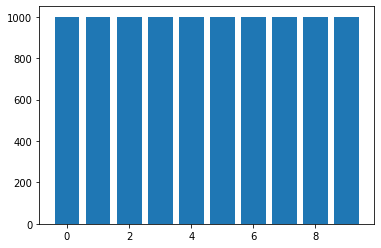

In [8]:
plt.bar(y_test.unique(),y_test.value_counts())

In [9]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [10]:
y_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0


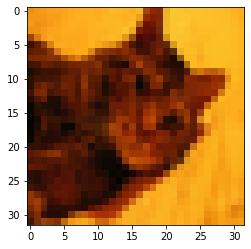

In [11]:
plt.imshow(random.choice(X_train))

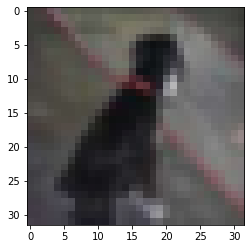

In [12]:
plt.imshow(random.choice(X_test))

In [13]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

In [16]:
opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = gen.flow(X_train, y_train, batch_size=32)
steps = int(X_train.shape[0] / 32)

In [18]:
history = model.fit(X_train, y_train, batch_size = 32, epochs=10, validation_split = 0.2)

Epoch 1/10
1250/1250 [==============================] - 220s 160ms/step - loss: 2.3125 - accuracy: 0.2652 - val_loss: 1.3794 - val_accuracy: 0.4907
Epoch 2/10
1250/1250 [==============================] - 206s 165ms/step - loss: 1.4183 - accuracy: 0.4851 - val_loss: 1.1659 - val_accuracy: 0.5817
Epoch 3/10
1250/1250 [==============================] - 207s 166ms/step - loss: 1.1819 - accuracy: 0.5828 - val_loss: 0.9817 - val_accuracy: 0.6509
Epoch 4/10
1250/1250 [==============================] - 205s 164ms/step - loss: 1.0483 - accuracy: 0.6338 - val_loss: 0.8605 - val_accuracy: 0.6947
Epoch 5/10
1250/1250 [==============================] - 206s 165ms/step - loss: 0.9350 - accuracy: 0.6755 - val_loss: 0.9497 - val_accuracy: 0.6698
Epoch 6/10
1250/1250 [==============================] - 204s 163ms/step - loss: 0.8572 - accuracy: 0.7016 - val_loss: 0.7312 - val_accuracy: 0.7458
Epoch 7/10
1250/1250 [==============================] - 203s 162ms/step - loss: 0.8019 - accuracy: 0.7273 - val_

(0.0, 2.0)

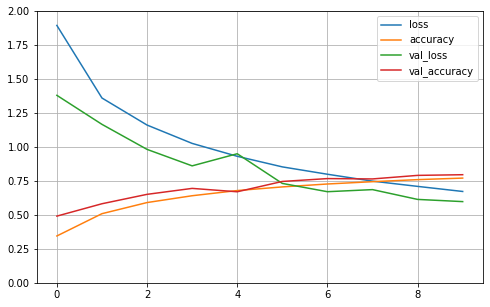

In [19]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)

In [20]:
_, acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.6189 - accuracy: 0.7897


In [21]:
print('> %.3f' % (acc * 100.0))

> 78.970


In [22]:
#Saving the model
model_json = model.to_json()
with open("CIFAR10_model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("CIFAR10_model.h5")